In [7]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

In [8]:
train_file = h5py.File("/Volumes/MacOS/Research/training_data_2054494.h5", "r")

In [9]:
def heat_map(jet_img, label):
    plt.imshow((jet_img/np.sum(jet_img)), norm=matplotlib.colors.LogNorm())#)
    plt.margins(0,0)
    #cbar = plt.colorbar()
    #cbar.set_label('ET in ECal Tower')
    #plt.xlabel('$\\eta$')
    #plt.ylabel('$\\phi$')
    plt.xticks([])
    plt.yticks([])
    plt.title(label)
    plt.savefig('figures/%s.pdf'%label)    
    plt.show()
    plt.clf()


In [10]:
X_train = train_file['features']
y_train = train_file['targets']


#N_train = len(X_train)
N_train = 10000
train_images=np.array(X_train[0:N_train])
train_labels=np.array(y_train[0:N_train])

In [11]:
sig = np.zeros((32,32))
bkg = np.zeros((32,32))


sig_index = np.where(train_labels == 1)
bkg_index = np.where(train_labels == 0)

In [13]:
for i in range(len(sig_index[0])):
  sig += train_images[sig_index[0][i],:,:,0]

for i in range(len(bkg_index[0])):
  bkg += train_images[bkg_index[0][i],:,:,0]


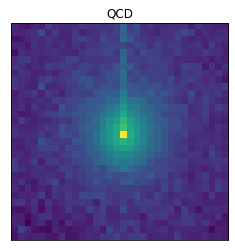

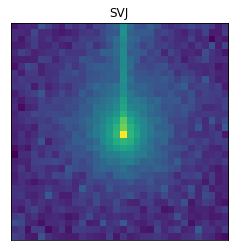

<Figure size 432x288 with 0 Axes>

In [14]:
heat_map(bkg, 'QCD')
heat_map(sig, 'SVJ')